In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
df = pd.read_csv("./locker data.csv")

# Raw Layer

In [40]:
df["AddDt"] = pd.to_datetime(df["AddDt"])

In [41]:
df = df[df["AddDt"] > "2021-07-26"]

In [42]:
df = df.iloc[:, [1, 3, 4, 5, 6]]

<AxesSubplot:>

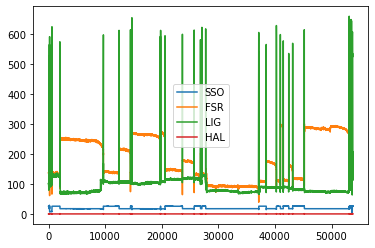

In [43]:
df.iloc[:, 1:].plot()

# Feature Layer

In [83]:
feature_df = df.copy()

## 조도센서
- 중간값인 300을 threshold로 잡아 디지털 신호로 변환

<AxesSubplot:>

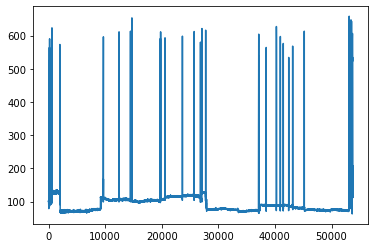

In [84]:
feature_df["LIG"].plot()

In [85]:
feature_df.loc[feature_df["LIG"] < 300, "LIG"] = 0
feature_df.loc[feature_df["LIG"] >= 300, "LIG"] = 1

<AxesSubplot:>

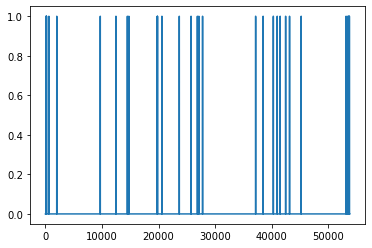

In [86]:
feature_df["LIG"].plot()

## 초음파센서
- 25와 17.5 사이의 값인 21.25를 기준으로 함

<AxesSubplot:>

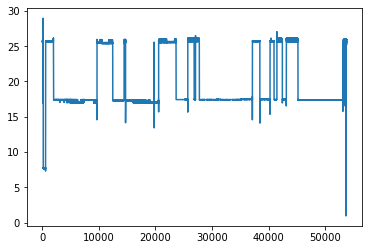

In [87]:
feature_df["SSO"].plot()

In [88]:
feature_df.loc[feature_df["SSO"] < 21.25, "SSO"] = 0
feature_df.loc[feature_df["SSO"] >= 21.25, "SSO"] = 1


<AxesSubplot:>

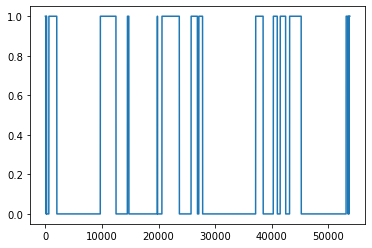

In [89]:
feature_df["SSO"].plot()

## 압력센서
- 값의 변동폭이 너무 커서 threshold값을 책정할 수 없다.

<AxesSubplot:>

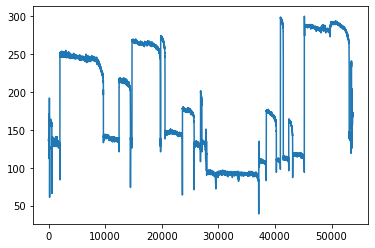

In [90]:
feature_df["FSR"].plot()

## 홀 센서 (자기 센서)
- 기존의 디지털 신호 그대로 차용

<AxesSubplot:>

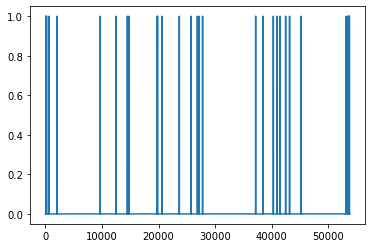

In [91]:
feature_df["HAL"].plot()

## 압력센서를 제외한 디지털신호 확인

In [92]:
def show(start, end):
    plt.figure(figsize=(10, 12))
    plt.subplot(311)
    plt.plot(feature_df.iloc[start:end, 1])
    plt.title("SSO")

    plt.subplot(312)
    plt.plot(feature_df.iloc[start:end, 3])
    plt.title("LIGHT")

    plt.subplot(313)
    plt.plot(feature_df.iloc[start:end, 4])
    plt.title("HAL")

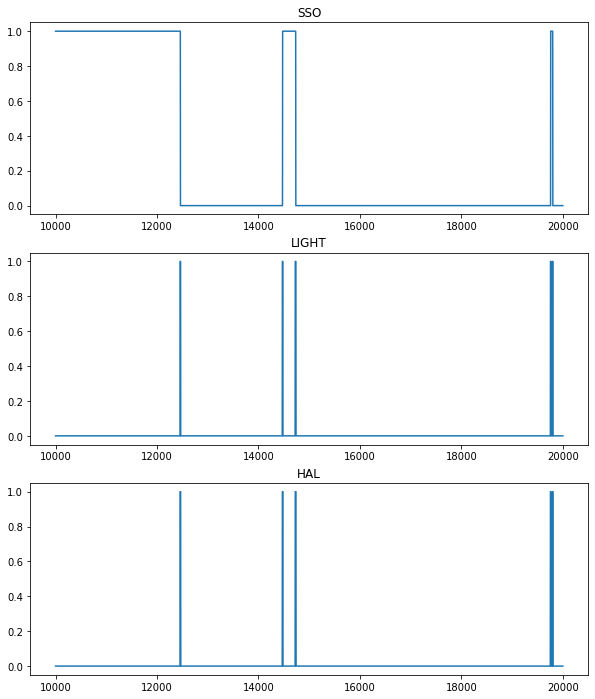

In [93]:
show(10000, 20000)

In [99]:
feature_df.iloc[14450:14500, 3]

14450    0
14451    0
14452    0
14453    0
14454    0
14455    0
14456    0
14457    0
14458    0
14459    0
14460    0
14461    0
14462    0
14463    0
14464    0
14465    0
14466    0
14467    0
14468    0
14469    1
14470    1
14471    1
14472    1
14473    1
14474    1
14475    1
14476    1
14477    1
14478    1
14479    1
14480    0
14481    0
14482    0
14483    0
14484    0
14485    0
14486    0
14487    0
14488    0
14489    0
14490    0
14491    0
14492    0
14493    0
14494    0
14495    0
14496    0
14497    0
14498    0
14499    0
Name: LIG, dtype: int64
